# Кластеризация в Python: метод  k-средних

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA # Метод главных компонент
from sklearn import preprocessing  # функция для предварительной обработки данных
from sklearn.cluster import KMeans # Кластеризация методом k-средних
from sklearn.metrics import silhouette_score # Метрика силуэта
import matplotlib.pyplot as plt  #импотируем подбиблиотеку и даем ей имя
import matplotlib    # для рисования

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Задачи/Labour.csv')

Основные переменные в датафрейме `df` (данные по бельгийским фирмам за 1996 г.)
- `capital`:капитал (в млн евро)
- `labour`: число сотрудников
- `output`: выпуск (в млн евро)
- `wage`: зарплата на одного сотрудника (в тыс евро)

In [4]:
df.head(n=6)

,capital,labour,output,wage
0,2.606563,184,9.250759,43.080307
1,1.323237,91,3.664310,27.780016
2,22.093692,426,28.781516,44.467748
3,10.737851,72,4.124642,39.734710
4,1.161365,46,2.890150,34.650709
5,276.796701,7642,480.140372,48.939782


In [5]:
# Нормализация данных
scaler=preprocessing.StandardScaler().fit(df)  # специфицируем нормализацию данных
data_rescaled=scaler.transform(df)  # применяем эту нормализацию к исходноыму датасету

## Метод k-средних (заданное число кластеров)
Вначале разобьём датасет на заданное число кластеров (например, на 3)

In [6]:
# Создаём объект класса KMeans с нужными параметрами
kmeans = KMeans(init="random", n_clusters=3)
# применяем метод .fit() для кластеризации данных
kmeans.fit(data_rescaled)
# кластерная переменная
print(kmeans.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 

<Axes: xlabel='labour', ylabel='output'>

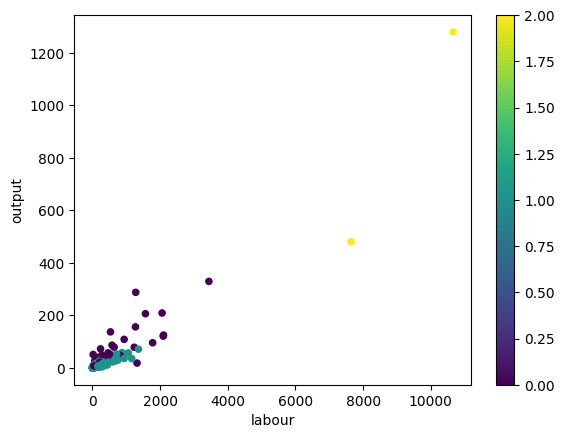

In [7]:
# визуализируем в исходных переменных
df.plot.scatter('labour', 'output', c=kmeans.labels_, colormap='viridis')

<Axes: xlabel='principal component 1', ylabel='principal component 2'>

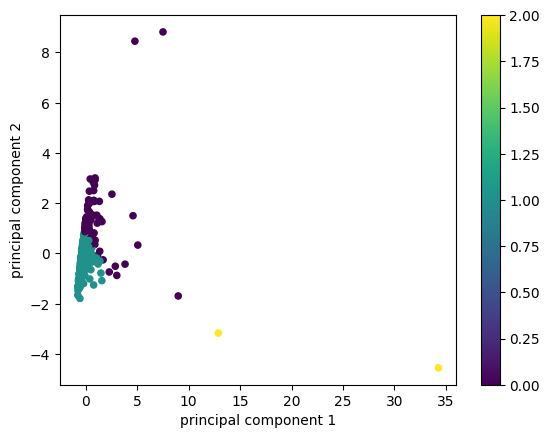

In [8]:
# Визуализация в главных компонентых
pca=PCA(n_components=2)
pca.fit(data_rescaled)
data_pca = pca.transform(data_rescaled)
df_pca = pd.DataFrame(data=data_pca, columns = ['principal component 1', 'principal component 2'])
df_pca.plot.scatter('principal component 1', 'principal component 2', c=kmeans.labels_, colormap='viridis')

## Метод k-средних: выбор числа кластеров
Метод силуэта

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

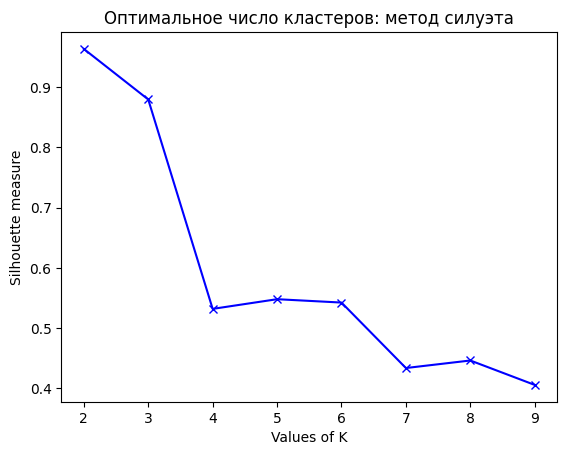

In [9]:
Silhouette_measure = []  # создаем массив длины 0
K = range(2,10)          #какие значения  k рассматриваеются
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data_rescaled)
    Silhouette_measure.append(silhouette_score(data_rescaled, kmeans.labels_))
plt.plot(K,Silhouette_measure,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette measure')
plt.title('Оптимальное число кластеров: метод силуэта')
plt.show()

**Оптимальное значение кластера**: 2 (там максимум функции)

Метод Elbow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

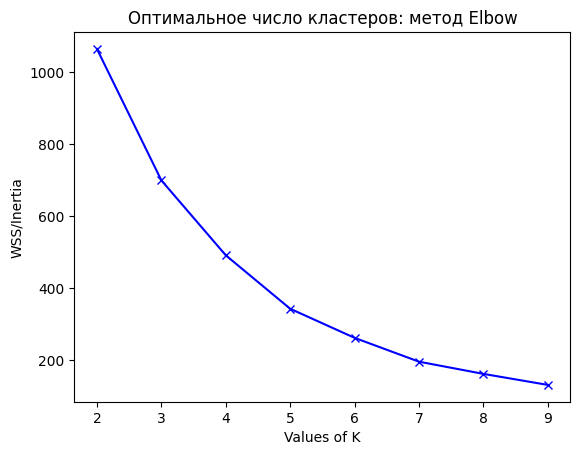

In [10]:
WSS = []  # создаем массив длины 0
K = range(2,10)          #какие значения  k рассматриваеются
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data_rescaled)
    WSS.append(kmeans.inertia_)
plt.plot(K,WSS,'bx-')
plt.xlabel('Values of K')
plt.ylabel('WSS/Inertia')
plt.title('Оптимальное число кластеров: метод Elbow')
plt.show()

**Оптимальное количество кластеров**: 4 или 5